# Sentiment Analysis of Tweets

## Case study: 
To collect past and present data using snscrape module for analysis of people's opinion and sentiment regarding the  Irish Dairy Products.

# get Started
## Libraries and Data Gathering

In [1]:
!pip install wordcloud


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install langdetect


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install emot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install textblob


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

  Cloning https://github.com/JustAnotherArchivist/snscrape.git to c:\users\owner\appdata\local\temp\pip-req-build-m8b7qor2
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit 786815dd05681e2421cd03aa9acf5ab5c773bce9
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for snscrape: filename=snscrape-0.6.2.20230321.dev13+g786815d-py3-none-any.whl size=73847 sha256=52fd2d8c69086ea5433522e81850cd3c87806317983d9a2f38380eb3d53280e1
  Stored in directory: C:\Users\Owner\AppData\Local\Temp\pip-ephem-wheel-cache-m_dkrlig\wheels\1a\ba\e2\39fa3a11802c4a622f2efc8be3f5ff854481051d0b4c

  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git 'C:\Users\Owner\AppData\Local\Temp\pip-req-build-m8b7qor2'

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [7]:
# Import Libraries
import nltk
# nltk.download('stopwords') #run once and comment it out to avoid it downloading multiple times 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer

import string
import re
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS
from emot.emo_unicode import UNICODE_EMOJI

lemmatizer = WordNetLemmatizer()     
    
from wordcloud import ImageColorGenerator
from PIL import Image

import warnings 
%matplotlib inline

In [8]:
# importing libraries and packages
import snscrape.modules.twitter as sntwitter
import seaborn as sns
import pandas
import pandas as pd
import numpy as np

In [18]:
tweets = pd.read_csv('./Downloads/tweetData/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', names=["target", "ids", "date", "flag", "user", "text"])

In [19]:
tweets.shape

(1600000, 6)

In [20]:
tweets.isna().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [21]:
tweets.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# Data preprocessing:
We will converting the words to lower case:the tweet column is converted to lower case words to make the words uniform.
Removing Url links, digits, punctuation, emojis and every other thing that may not be necessary for the sentiment analysis
Tokenizing the tweets column that is breaking the sentence down into bits of words
Removing stop words: This are word that don’t give meaning to the context of a sentence example is, the etc.
Lemmatizing words: This is to get the base of words ie bags the lemmatized form is bag.

In [22]:
eng_stop_word = list(stopwords.words('english'))

In [23]:
def ProcessedTweets(text):
    #changing tweet text to small letter
    text = text.lower()
    #removing @ and links
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", text).split())
    #removing repeating characters
    text = re.sub(r'\@\w+|\#\w+|\d+', '', text)
    #removing puntuations and number
    punct = str.maketrans('','',string.punctuation+string.digits)
    text = text.translate(punct)
    #tokenising words and removing stop words from the tweet text
    tokens = word_tokenize(text)
    eng_stop_word = list(stopwords.words('english'))
    filtered_words = [w for w in tokens if w not in eng_stop_word]
#     filtered_words = [w for w in filtered_words if w not in emoji]
    #lemmetizingwords
    lemmatizer =WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    text = " ".join(lemma_words)
    return text   

In [24]:
emoji = list (UNICODE_EMOJI.keys())

# Sentiment Analysis

In [25]:
#function for polarity score
def polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [26]:
#getting sentiment type and setting condition
def sentimenttextblob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"

In [28]:
#getting polarity and sentiment
tweets['Polarity'] = tweets['text'].apply(polarity)
tweets['Sentiment'] = tweets['Polarity'].apply(sentimenttextblob)
sentiments = tweets['Sentiment'].value_counts()
sentiments

Positive    698007
Neutral     568723
Negative    333270
Name: Sentiment, dtype: int64

## Visualisation 

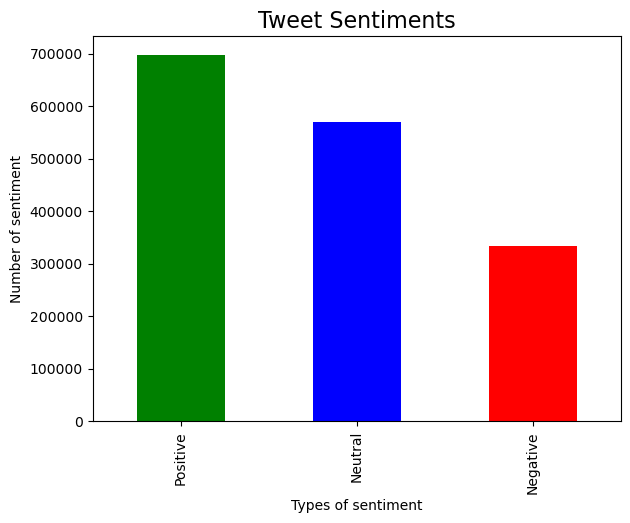

In [29]:
# plotting bar chart for the Sentiment
#blue is the student best colour and that's the only rational behind the blue colour
plt.subplot(1,2,1)
sentiments.plot(kind='bar', color=['green','blue','red'], figsize=(15,5))
plt.title('Tweet Sentiments', fontsize=16)
plt.xlabel('Types of sentiment')
plt.ylabel('Number of sentiment');

In [30]:
import numpy as np
import matplotlib.pyplot as plt

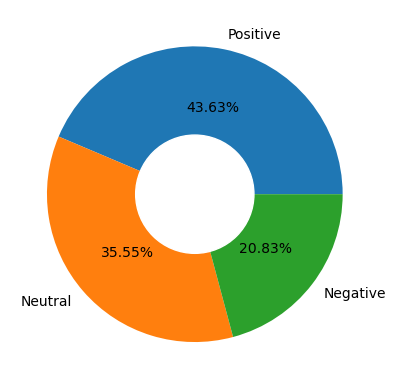

In [31]:
plt.pie(sentiments, labels = ['Positive', 'Neutral', 'Negative'], autopct = '%1.2f%%')
circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

In [32]:
import nltk
nltk.download('omw-1.4')

# convert the tweet text into a string separate with " "
tweets['Processed_Tweets'] = tweets['text'].apply(ProcessedTweets)
tweets_string = tweets['Processed_Tweets'].tolist()
tweets_string = " ".join(tweets_string)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


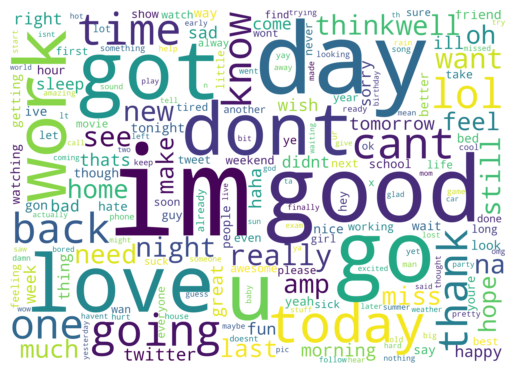

In [33]:
# Displaying the most talked about word in a word cloud 
# some stop words were still evident 
# Instantiate the Twitter word cloud object
w_cloud = WordCloud(collocations = False,max_words=200, background_color = 'white', width = 7000, height = 5000).generate(tweets_string)

# Display the generated Word Cloud
plt.imshow(w_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Labelling

In [46]:
# labelling
from sklearn.preprocessing import *
le = LabelEncoder()
tweets['Sentiment'] = le.fit_transform(tweets['Sentiment'])

## Modelling

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     66468
           1       0.98      0.96      0.97    113776
           2       0.94      0.96      0.95    139756

    accuracy                           0.95    320000
   macro avg       0.94      0.94      0.94    320000
weighted avg       0.95      0.95      0.95    320000

[[ 59792   1023   5653]
 [  1841 109161   2774]
 [  4062   1652 134042]]


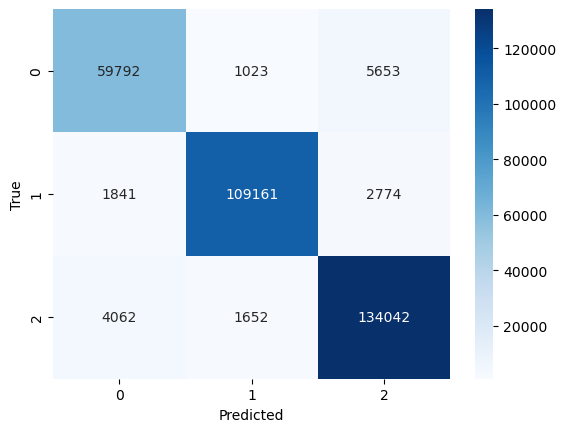

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(tweets['text'], tweets['Sentiment'], test_size=0.2, random_state=42)

# Create TF-IDF vectorizer and transform the text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a classification model (e.g., LinearSVC)
model = LinearSVC()
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [52]:
import pandas as pd
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression

# Sort the data by date in ascending order
df = tweets.sort_values(by="date")

# Set the date column as the index
df.set_index("date", inplace=True)

# Calculate the rolling mean of sentiment with a window size of 7 days for one week forecast
df['sentiment_7d'] = df['Sentiment'].rolling(window=7).mean()

# Calculate the rolling mean of sentiment with a window size of 30 days for one month forecast
df['sentiment_30d'] = df['Sentiment'].rolling(window=30).mean()

# Calculate the rolling mean of sentiment with a window size of 90 days for three months forecast
df['sentiment_90d'] = df['Sentiment'].rolling(window=90).mean()

# Generate forecast dates
end_date = df.index[-1]
one_week_forecast_date = end_date + str(timedelta(days=7))
one_month_forecast_date = end_date + str(timedelta(days=30))
three_months_forecast_date = end_date + str(timedelta(days=90))

# Get the sentiment forecasts
one_week_forecast = df.loc[end_date, 'sentiment_7d']
one_month_forecast = df.loc[end_date, 'sentiment_30d']
three_months_forecast = df.loc[end_date, 'sentiment_90d']

# Print the sentiment forecasts
print("One week sentiment forecast:", str(one_week_forecast))
print("One month sentiment forecast:", str(one_month_forecast))
print("Three months sentiment forecast:", str(three_months_forecast))


One week sentiment forecast: date
Wed May 27 07:27:38 PDT 2009    1.428571
Wed May 27 07:27:38 PDT 2009    1.285714
Wed May 27 07:27:38 PDT 2009    1.142857
Wed May 27 07:27:38 PDT 2009    1.428571
Wed May 27 07:27:38 PDT 2009    1.571429
Wed May 27 07:27:38 PDT 2009    1.714286
Name: sentiment_7d, dtype: float64
One month sentiment forecast: date
Wed May 27 07:27:38 PDT 2009    1.500000
Wed May 27 07:27:38 PDT 2009    1.466667
Wed May 27 07:27:38 PDT 2009    1.500000
Wed May 27 07:27:38 PDT 2009    1.533333
Wed May 27 07:27:38 PDT 2009    1.566667
Wed May 27 07:27:38 PDT 2009    1.566667
Name: sentiment_30d, dtype: float64
Three months sentiment forecast: date
Wed May 27 07:27:38 PDT 2009    1.400000
Wed May 27 07:27:38 PDT 2009    1.400000
Wed May 27 07:27:38 PDT 2009    1.388889
Wed May 27 07:27:38 PDT 2009    1.388889
Wed May 27 07:27:38 PDT 2009    1.400000
Wed May 27 07:27:38 PDT 2009    1.411111
Name: sentiment_90d, dtype: float64


In [ ]:
# Plot historical sentiment and forecasts
plt.figure(figsize=(12, 6))
plt.plot(df.index, tweets['Sentiment'], label='Historical Sentiment')
plt.axvline(x=one_week_forecast_date, color='r', linestyle='--', label='One Week Forecast')
plt.axvline(x=one_month_forecast_date, color='g', linestyle='--', label='One Month Forecast')
plt.axvline(x=three_months_forecast_date, color='b', linestyle='--', label='Three Months Forecast')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Sentiment Forecast')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Owner\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\Owner\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
